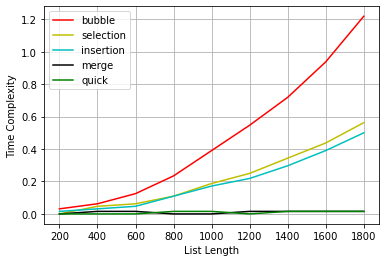

In [29]:
import time
import copy
from numpy.random import seed
from numpy.random import randint
import matplotlib.pyplot as plt

def bubbleSort(array):

    for i in range(len(array)):

        swapped = False

        for j in range(0, len(array) - i - 1):

            if array[j] > array[j + 1]:

                temp = array[j]
                array[j] = array[j+1]
                array[j+1] = temp

                swapped = True

        if not swapped:
            break 

def selectionSort(array):

    swapped = False

    for i in range(len(array)):

        index = i

        for j in range(i+1,len(array)):

            if array[j]<array[index]:
                index=j

                swapped=True


        temp=array[i]
        array[i]=array[index]
        array[index]=temp

        if not swapped:
            break
            
def insertionSort(array):

    for i in range(1,len(array)):

        key=array[i]
        j=i-1

        while((j>-1) and (array[j]>key)):
            array[j+1]=array[j]
            j=j-1
        
        array[j+1]=key
                
def mergeSort(arr):
    if len(arr) > 1:

        mid = len(arr)//2

        L = arr[:mid]

        R = arr[mid:]

        mergeSort(L)

        mergeSort(R)

        i = j = k = 0

        while i < len(L) and j < len(R):
            if L[i] <= R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1
            
# в качестве опорного выберем последний, зависимость от выбора исследуем в следующей клетке 

def partition(array, low, high):
 
    pivot = array[high]

    i = low - 1

    for j in range(low, high):
        if array[j] <= pivot:

            i = i + 1

            (array[i], array[j]) = (array[j], array[i])

    (array[i + 1], array[high]) = (array[high], array[i + 1])
 
    return i + 1
 
def quickSort(array, low, high):
    if low < high:

        pi = partition(array, low, high)

        quickSort(array, low, pi - 1)

        quickSort(array, pi + 1, high)
                
elements_bubble = list()
times_bubble = list()

elements_selection = list()
times_selection = list()

elements_insertion = list()
times_insertion = list()

elements_merge = list()
times_merge = list()

elements_quick = list()
times_quick = list()

b = []

for i in range(1, 10):
 
    a = randint(0, 200 * i, 200 * i)
    b = copy.deepcopy(a)
    size = len(a)
    start = time.process_time()
    bubbleSort(b)
    end = time.process_time()

    elements_bubble.append(len(a))
    times_bubble.append(end-start)
    
    b = copy.deepcopy(a)
    start = time.process_time()
    selectionSort(b)
    end = time.process_time()
 
    elements_selection.append(len(a))
    times_selection.append(end-start)
    
    b = copy.deepcopy(a)
    start = time.process_time()
    insertionSort(b)
    end = time.process_time()
 
    elements_insertion.append(len(a))
    times_insertion.append(end-start)
    
    b = copy.deepcopy(a)
    start = time.process_time()
    mergeSort(b)
    end = time.process_time()
 
    elements_merge.append(len(a))
    times_merge.append(end-start)
    
    b = copy.deepcopy(a)
    start = time.process_time()
    quickSort(b, 0, size - 1)
    end = time.process_time()
 
    elements_quick.append(len(a))
    times_quick.append(end-start)
    
    
plt.xlabel('List Length')
plt.ylabel('Time Complexity')
plt.plot(elements_bubble, times_bubble, 'r')
plt.plot(elements_selection, times_selection, 'y')
plt.plot(elements_insertion, times_insertion, 'c')
plt.plot(elements_merge, times_merge, 'k')
plt.plot(elements_quick, times_quick, 'g')
plt.grid()
plt.legend(['bubble', 'selection', 'insertion', 'merge', 'quick'], loc=2)
plt.show()

очень маленькие по размеру массивы оказывались нерепрезентативными, большие с учетом наличия квадратичных сортировок перегружали клетку. Из графиков видно как выделяются три подгруппы: пузырьковая, которая каждый раз оказывалась хуже всех в т.ч. "коллег" по классификации квадратичных сортировок; сортировки выбором и вставкой, которые сравнимы по скорости между собой и быстрые, которые на предложенных масштабах неразличимы. Исследуем их поведение на больших массивах:

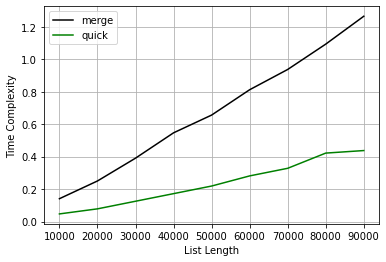

In [34]:
import time
import copy
from numpy.random import seed
from numpy.random import randint
import matplotlib.pyplot as plt


def mergeSort(arr):
    if len(arr) > 1:

        mid = len(arr)//2

        L = arr[:mid]

        R = arr[mid:]

        mergeSort(L)

        mergeSort(R)

        i = j = k = 0

        while i < len(L) and j < len(R):
            if L[i] <= R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1
            
# в качестве опорного выберем последний, зависимость от выбора исследуем в следующей клетке 

def split_barrier(A, barrier):

    left = [] 
    middle = []  
    right = []
    
    for x in A: 
        if x < barrier:
            left.append(x)
        elif x == barrier:
            middle.append(x)
        else:
            right.append(x)
    return left, middle, right
def quickSort(A):
    
    if (len(A) <= 1):
    
        return A
    
    else:
        L, M, R = split_barrier(A, A[-1])
        A = quickSort(L) + M + quickSort(R)
        
    return A
                

elements_merge = list()
times_merge = list()

elements_quick = list()
times_quick = list()

b = []

for i in range(1, 10):
 
    a = randint(0, 10000 * i, 10000 * i)    
    b = copy.deepcopy(a)
    start = time.process_time()
    mergeSort(b)
    end = time.process_time()
 
    elements_merge.append(len(a))
    times_merge.append(end-start)
    
    b = copy.deepcopy(a)
    start = time.process_time()
    quickSort(b)
    end = time.process_time()
 
    elements_quick.append(len(a))
    times_quick.append(end-start)
    
    
plt.xlabel('List Length')
plt.ylabel('Time Complexity')
plt.plot(elements_merge, times_merge, 'k')
plt.plot(elements_quick, times_quick, 'g')
plt.grid()
plt.legend(['merge', 'quick'], loc=2)
plt.show()

быстрая сортировка оказывается больше чем в три раза быстрее при приближении длины массива к 10^5 элеменов

известно, что для быстрой сортировки значение имеет выбор опорного элемента. Рассмотрим зависимость времени работы от способа выбора опорного элемента для быстрой сортировки:

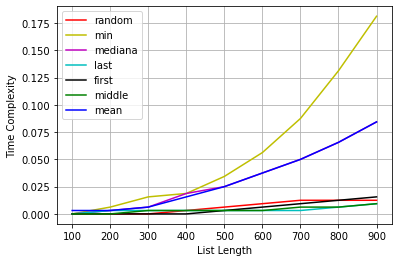

In [13]:
import time
import copy
import statistics
from numpy.random import seed
from numpy.random import randint
import matplotlib.pyplot as plt

def split_barrier(A, barrier):

    left = [] 
    middle = []  
    right = []
    
    for x in A: 
        if x < barrier:
            left.append(x)
        elif x == barrier:
            middle.append(x)
        else:
            right.append(x)
    return left, middle, right

def mediana(a):
    return statistics.median(a)

def last(a):
    return a[-1]

def rand(a):
    return a[randint(len(a))]

def first(a):
    return a[0]

def minel(a):
    return min(a)

def middle(a):
    return a[len(a) // 2]

def mean(a):
    return statistics.mean(a)


def quickSort(A, func):
    
    if (len(A) <= 1):
    
        return A
    
    else:
        L, M, R = split_barrier(A, func(A))
        A = quickSort(L, func) + M + quickSort(R, func)
        
    return A

elements_random = list()
times_random = list()

elements_min = list()
times_min = list()

elements_mediana = list()
times_mediana = list()

elements_last = list()
times_last = list()

elements_first = list()
times_first = list()

elements_middle = list()
times_middle = list()

elements_mean = list()
times_mean = list()

element_random = 0
time_random = 0

time_min = 0
time_mediana = 0
time_last = 0
time_first = 0
time_middle = 0
time_mean = 0
time_min = 0

b = []

for i in range(1, 10):
    for j in range(5):                                        #усредняем по пяти значениям
        a = randint(0, 100 * i, 100 * i)    
        b = copy.deepcopy(a)
        r = randint(len(a))
        start = time.process_time()
        quickSort(b, rand)
        end = time.process_time()
 
        time_random += (end-start)
    
        b = copy.deepcopy(a)
        start = time.process_time()
        quickSort(b, minel)
        end = time.process_time()
 
        time_min += (end-start)
    
        b = copy.deepcopy(a)
        start = time.process_time()
        quickSort(b, mediana)
        end = time.process_time()
 
        time_mediana += (end-start)
    
        b = copy.deepcopy(a)
        start = time.process_time()
        quickSort(b, last)
        end = time.process_time()
 
        time_last += (end-start)
    
        b = copy.deepcopy(a)
        start = time.process_time()
        quickSort(b, first)
        end = time.process_time()
 
        time_first += (end-start)
    
        b = copy.deepcopy(a)
        start = time.process_time()
        quickSort(b, middle)
        end = time.process_time()
        
        time_middle += (end-start)
        
        b = copy.deepcopy(a)
        start = time.process_time()
        quickSort(b, mean)
        end = time.process_time()
        
        time_mean += (end-start)
    
    elements_random.append(len(a))
    times_random.append(time_random / 5)
    elements_min.append(len(a))
    times_min.append(time_min / 5)
    elements_mediana.append(len(a))
    times_mediana.append(time_mediana / 5)
    elements_last.append(len(a))
    times_last.append(time_last / 5)
    elements_first.append(len(a))
    times_first.append(time_first / 5)
    elements_middle.append(len(a))
    times_middle.append(time_middle / 5)
    elements_mean.append(len(a))
    times_mean.append(time_mean / 5)
    
plt.xlabel('List Length')
plt.ylabel('Time Complexity')
plt.plot(elements_random, times_random, 'r')
plt.plot(elements_min, times_min, 'y')
plt.plot(elements_mediana, times_mediana, 'm')
plt.plot(elements_last, times_last, 'c')
plt.plot(elements_first, times_first, 'k')
plt.plot(elements_middle, times_middle, 'g')
plt.plot(elements_mean, times_mean, 'b')
plt.grid()
plt.legend(['random', 'min', 'mediana', 'last', 'first', 'middle', 'mean'], loc=2)
plt.show()

видно даже на небольших массивах, что минимальный (аналогично максимальный) выбирать в качестве опорных крайне невыгодно (асимптотика стремится к квадратичной), что прямо следует из сути сортировки; если задавать опорный элемент через функцию(минимальное, медиана, среднее), то время ее выполнения каждый раз вносит вклад в итоговое время сортировки (не меньше О(n), но на больших значениях при среднем для самОй быстрой сортировки O(nlog(n)) вклад уменьшается), поэтому не уверена что это то что нужно